# Principle Component Analysis

In this notebook, we briefly introduce the concept of Principle component Aanalysis, then apply it on the CVDs data set.

---

## Introduction

[Principle Component Analysis]() is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. 

The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The $i$-th principal component can be taken as a direction orthogonal to the first $i-1$ principal components that maximizes the variance of the projected data.

It can be shown that the principal components are eigenvectors of the data's covariance matrix. Thus, the principal components are often computed by eigendecomposition of the data covariance matrix or singular value decomposition of the data matrix.

---

## Algorithm

The goal of PCA is to reduce the dimensionality of the feature vectors used in training machine learning algorithms. The steps in PCA are:

1. **Stadardize (center and scale) the data.** 
2. **Compute the covariance or correlation matrix.**
3. **Find the eigenvalues and the orthonormal eigenvectors of correlation matrix.**
4. **Find the principal components.**
5. **Reduce the dimension of the data.**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv("./Datasets/palmer_penguins.csv")
X1 = df[["bill_depth_mm", "bill_length_mm", "flipper_length_mm", "body_mass_g"]]
X = X1.to_numpy()
y1 = df["species"]
y = y1.to_numpy()

---

The goal of PCA is to reduce the dimensionality of the feature vectors used in training machine learning algorithms. The steps in PCA are:

1. **Stadardize (center and scale) the data.** 

To center the data, we average each row by replacing the value $x$ by 
$$
x - \text{mean}
$$
Data values may have vastly different ranges, and so, to ensure that PCA is not selecting wrong directions in describing data variation, we also divide by the standard deviation. That is, we scale the data in each variable by finding the *$z$-scores*:

$$
z = \frac{x - \text{mean}}{\text{standard devation}}
$$

Finally, we form the $m\times n$ matrix $A$. 

2. **Compute the covariance or correlation matrix**:

$$
S = \frac{1}{n-1}AA^T
$$

If we are working with only centered data, the above matrix is the covariance matrix, and if we are working with scaled data, then $S$ is the correlation matrix. The entries on the diagonal are the variances (or correlations) for each variable and the off-diagonal entries are the covariances (or correlations) between two variables: positive covariance indicates that the variables are directly related (when one increases, the other increases as well), negative covariance indicates inverse relationship (when one increases, the other decreases). This matrix is symmetric of size $m \times m$, so its columns are of the same size as the columns of $A$.

3. **Find the eigenvalues and the orthonormal eigenvectors of $S$.** 

These eigenvectors are columns of the matrix $U$ in the singular value decomposition of $A$, up to the factor $n-1$. Further, we denote the eigenvalues by $\sigma_{i}^{2}$. This is equivalent to the **Singular Value Decomposition** of our shifted training set matrix $A$,

$$
A = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}, 
$$




---

In [2]:

A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (333, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [3]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



---


4. **Find the principal components.**

We arrange the eigenvalues found in the previous step in the decreasing order. The first principal component $PC_1$ is in the direction of the 1st eigenvector, the second principal component $PC_2$ is in the direction of the 2nd eigenvector, etc. The entries of each $PC_i$ are called *loading scores* and they tell us how the $PC_i$ is a linear combination of features.

5. **Reduce the dimension of the data.**

We project data points (i.e., columns of $A$) onto the selected principal components (i.e., several eigenvectors of $S$). By the Eckart-Young theorem we know that the line closest to the data points is in the direction of $PC_1$, etc (”closest” is in the sense of perpendicular least squares).

In addition, the total variance, which is the trace of $S$, is

$$
T = \text{trace}(S) = \frac{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}{n-1},
$$

and the $i$-th principle component $PC_i$ explains

$$
\frac{\sigma_{i}^{2}/(n-1)}{T} = \frac{\sigma_{i}^{2}}{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}
$$

of the total variation. We use a scree plot to graph the percentages of variation that each $PC_i$ accounts for. Also, the sum of squared distances from the points projected to $PC_i$ to the origin is the eigenvalue for $PC_i$ or the squared singular value $\sigma_{i}^{2}$.




---


To project the data contained in $A$ onto the first two principle component axis, we compute $A [PC_1 PC_2]$.




---

In [4]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

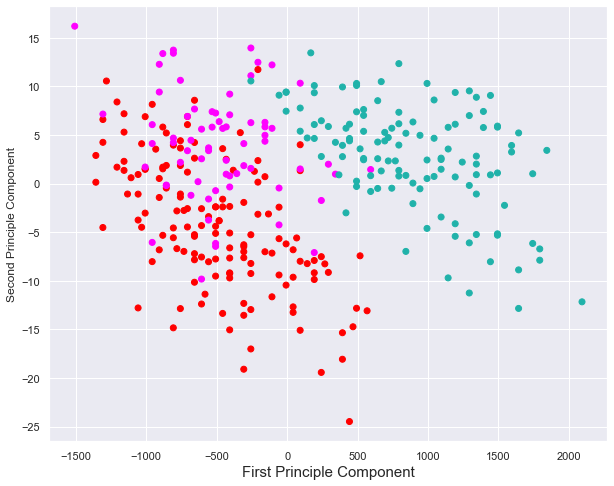

In [5]:
def colors(y):
    if y == "Adelie":
        return "red"
    elif y == "Chinstrap":
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()


In [6]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68633893 0.19452929 0.09216063 0.02697115]
per_var = [68.63 19.45  9.22  2.7 ] 



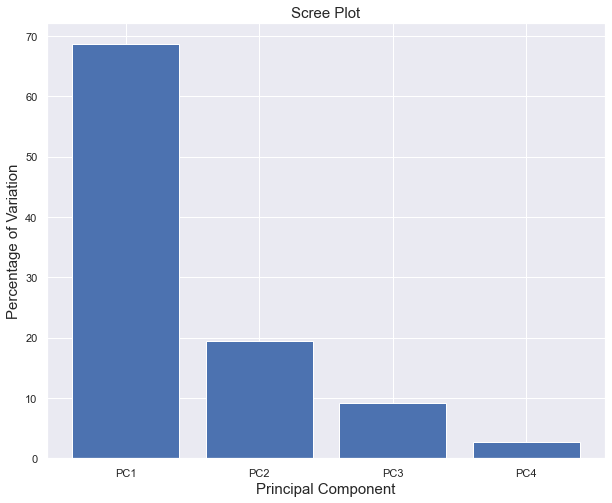

In [7]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [8]:
set(df.columns)

{'Unnamed: 0',
 'bill_depth_mm',
 'bill_length_mm',
 'body_mass_g',
 'flipper_length_mm',
 'island',
 'sex',
 'species'}

In [9]:
# we call function pca.components_ to see how each PC is obtained
# as a linear combination of the original coordinates

# for example, here PC1 = 0.522 * sepal_length + 0.372 * sepal_width - 0.721 * petal_length - 0.262 * petal_width

# features = list(set(df.columns) - {"species"})
features = list(set(X1.columns))

pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4
bill_length_mm,-0.399047,0.453753,0.576825,0.549675
bill_depth_mm,0.796170,0.600195,0.005788,0.076464
flipper_length_mm,-0.425800,0.642495,-0.236095,-0.591737
body_mass_g,-0.159904,0.145170,-0.781984,0.584686


In [10]:
# we use pca.transform to see how our data looks like in the new coordinate system

# this will be used later to plot our data in the first two coordinates PC1, PC2

pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416
...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892
329,1.832651,-0.784510,0.240758,-0.008955
330,2.751505,0.266556,-0.419306,0.236256
331,1.713854,-0.725875,-0.262764,0.330004


In [11]:
# we add to the previous table the labels for each flower

projected_df = pd.concat([pca_df, df.species], axis = 1)
projected_df

,PC1,PC2,PC3,PC4,species
0,-1.853593,0.032069,-0.234902,0.528397,Adelie
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie
3,-1.885288,-0.012351,-0.628873,-0.472893,Adelie
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie
...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo
330,2.751505,0.266556,-0.419306,0.236256,Gentoo
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo


In [12]:
projected_df["color"] = c
projected_df

,PC1,PC2,PC3,PC4,species,color
0,-1.853593,0.032069,-0.234902,0.528397,Adelie,red
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie,red
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie,red
3,-1.885288,-0.012351,-0.628873,-0.472893,Adelie,red
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie,red
...,...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo,lightseagreen
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo,lightseagreen
330,2.751505,0.266556,-0.419306,0.236256,Gentoo,lightseagreen
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo,lightseagreen


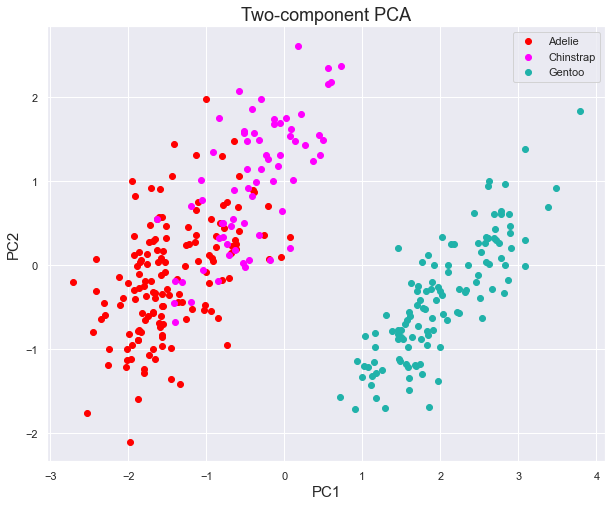

In [13]:
targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

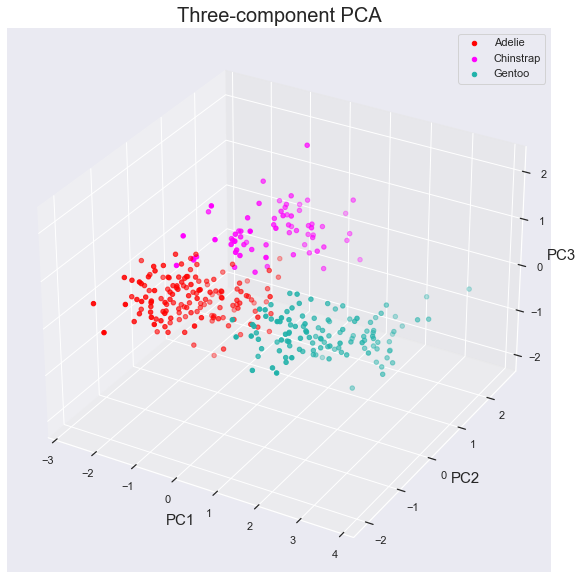

In [30]:
from mpl_toolkits.mplot3d import Axes3D
## We add to the previous table the labels
# projected_df = pd.concat([pca_df, y], axis = 1)

targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (15, 10))
ax = plt.subplot(111, projection = '3d')

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    ax.scatter(temp_df["PC1"], temp_df["PC2"], temp_df['PC3'],
                c = color)

ax.set_xlabel('PC1', size = 15)
ax.set_ylabel('PC2', size = 15)
ax.set_zlabel('PC3', size = 15)
plt.title('Three-component PCA', size = 20)
plt.legend(targets)
plt.show()